In [1]:
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
file = ROOT.TFile.Open("../output/Charmonium2018B_test/dstar_charmonium_2018B.root")

mass = ROOT.RooRealVar("mass", "", 0.14, 0.16)
data = ROOT.RooDataSet("data", "", file.Dstar, ROOT.RooArgSet(mass))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision


In [3]:
## Signal definition

# Gaussian 1

yield_g1 = ROOT.RooRealVar("yield g1", "", 4.5e3, 0, 7e3)
mean = ROOT.RooRealVar("mean","", 0.1455, 0.14, 0.16)
sigma_g1 = ROOT.RooRealVar("sigma g1", "", 0.001, 0.0, 1.0)

# Gaussian 2

yield_g2 = ROOT.RooRealVar("yield g2", "", 4.5e3, 0, 5e3)
sigma_g2 = ROOT.RooRealVar("sigma g2", "", 0.001, 0.0, 1.0)

# Pdfs

gauss1 = ROOT.RooGaussian("gauss 1", "", mass, mean, sigma_g1)
gauss2 = ROOT.RooGaussian("gauss 2", "", mass, mean, sigma_g2)

In [4]:
## Background

# Phenomenological threshold function

yield_back = ROOT.RooRealVar("yield back", "", 5e4, 0, 6e4)
p0 = ROOT.RooRealVar("pzeroz","", 1, -2, 20)
p1 = ROOT.RooRealVar('pone',"", 1.1e-1, -10, 10)
p2 = ROOT.RooRealVar('ptwo',"", 10, 1, 20)
#
back = ROOT.RooGenericPdf("Phen thrs func","","(1 - exp(-(@0 -0.13957)/@1)) * (@0/0.13957)**@2 + @3 * (@0/0.13957 - 1)", ROOT.RooArgList(mass,p0,p1,p2))

In [5]:
# Model definition and fitting
model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(gauss1, gauss2, back),
                       ROOT.RooArgList(yield_g1, yield_g2, yield_back))

#model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(gauss1, gauss2),
#                     ROOT.RooArgList(yield_g1, yield_g2))

In [6]:
result = model.fitTo(data, ROOT.RooFit.Extended(True), ROOT.RooFit.Range(0.14, 0.16), ROOT.RooFit.SumW2Error(True))

[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'fit' created with bounds [0.14,0.16]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'NormalizationRangeForfit' created with bounds [0.14,0.16]
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'fit_nll_model_data' created with bounds [0.14,0.16]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Phen thrs func_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Phen thrs func_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Minization --  T

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_data'
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Phen thrs func_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[mass|fit_nll_model_data]_Norm[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choic

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Info in <TCanvas::Print>: png file Dstar_fit.png has been created


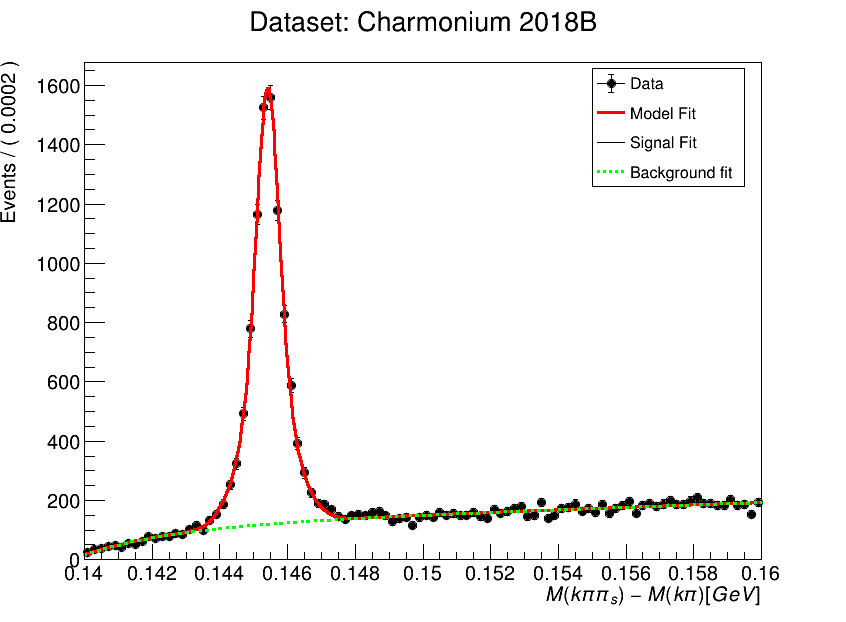

In [46]:
## Plots

# Colors and styles
colors = {"model" : 2, "signal" : 4, "background" : 3}
styles = {"model" : 1, "signal" : 1, "background" : 2}

# Canvas Definition
can = ROOT.TCanvas("can", "histograms", 850, 650)

# Frame creation
frame = mass.frame(ROOT.RooFit.Title("Dataset: Charmonium 2018B"))
frame.GetXaxis().SetTitle("M(k\pi\pi_s) - M(k\pi) [GeV]")

# Data
data.plotOn(frame, ROOT.RooFit.Name("Data"), ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))

# Model
model.plotOn(frame, ROOT.RooFit.Name("Model"), ROOT.RooFit.LineStyle(styles["model"]), ROOT.RooFit.LineColor(colors["model"]))

# Signal
model.plotOn(frame, ROOT.RooFit.Name("Signal"), ROOT.RooFit.Components(ROOT.RooArgSet(gauss1, gauss2)), ROOT.RooFit.LineStyle(styles["signal"]), ROOT.RooFit.LineColor(colors["signal"]))

# Background
model.plotOn(frame, ROOT.RooFit.Name("Background"), ROOT.RooFit.Components("Phen thrs func"), ROOT.RooFit.LineStyle(styles["background"]), ROOT.RooFit.LineColor(colors["background"]))

## Legends

leg = ROOT.TLegend(0.7, 0.7, 0.88, 0.89)
leg.AddEntry(frame.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame.findObject("Model"), "Model Fit", "L")
leg.AddEntry(frame.findObject("Signal"), "Signal Fit", "L")
leg.AddEntry(frame.findObject("Background"), "Background fit", "L")

frame.Draw()
leg.Draw("same")

can.Draw()

can.SaveAs("Dstar_fit.png")